<a href="https://colab.research.google.com/github/omniaghazy/GTC-ML-Project-2---Diabetes-Prediction-Model/blob/main/GTC_ML_Project_2_Diabetes_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries for phase 1


1.   cleaning
2.   preprocessing
3.   EDA





In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing


In [394]:
my_dataset = pd.read_csv("/content/diabetes.csv")

shape of dataser


In [395]:
my_dataset.shape

(768, 9)

it has :

 768 sample

 9 features (8 + target)

read first  samples


In [396]:
my_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Cleaning

info about dataset

In [397]:
my_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [398]:
my_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Invalid values**

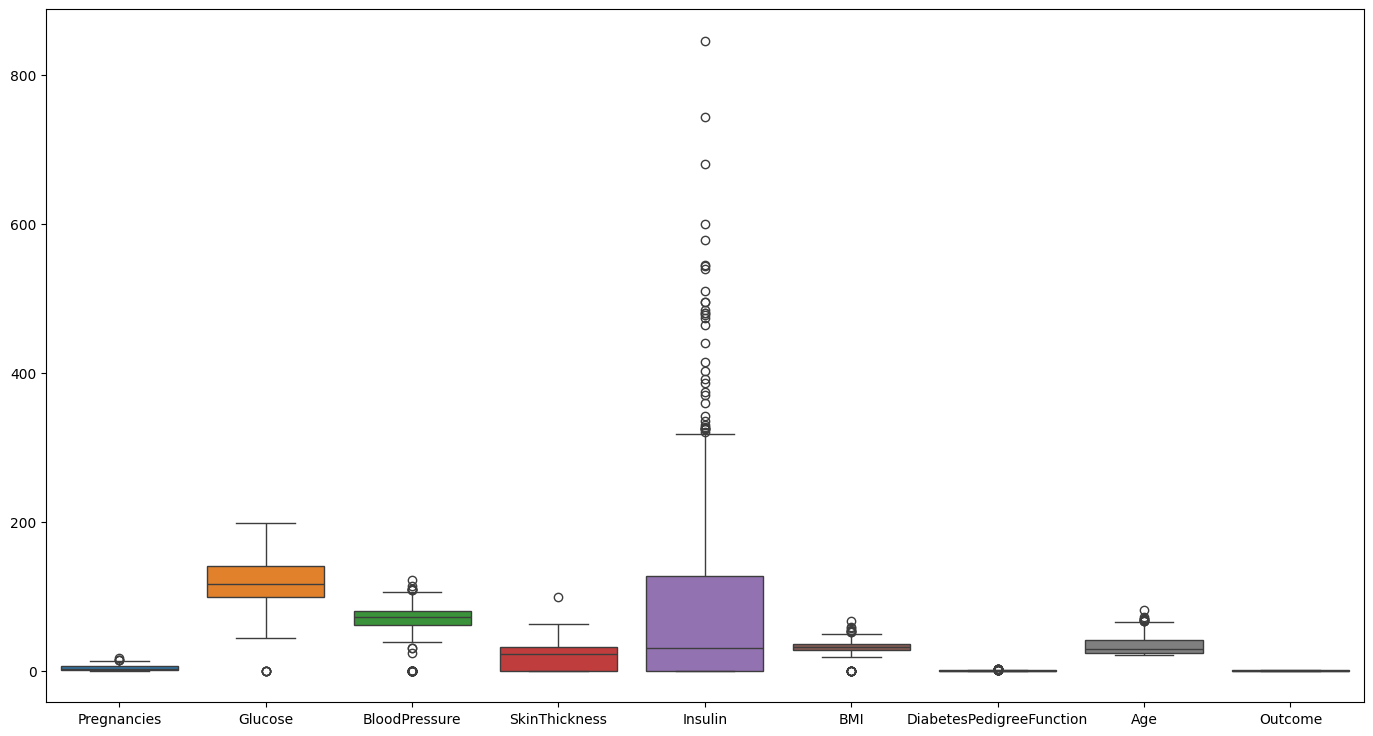

In [399]:
plt.figure(figsize =(17,9))
sns.boxplot(data=my_dataset)
plt.show()


In [400]:
numerical_features = my_dataset.columns
numerical_features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [401]:
for feature in numerical_features:
 print(feature,':',my_dataset[feature].nunique() ,my_dataset[feature].min(),my_dataset[feature].max())

Pregnancies : 17 0 17
Glucose : 136 0 199
BloodPressure : 47 0 122
SkinThickness : 51 0 99
Insulin : 186 0 846
BMI : 248 0.0 67.1
DiabetesPedigreeFunction : 517 0.078 2.42
Age : 52 21 81
Outcome : 2 0 1


features can't be = 0 ⏭

Glucose : 136 0 199

BloodPressure : 47 0 122

SkinThickness : 51 0 99

Insulin : 186 0 846

BMI : 248 0.0 67.1

In [402]:
cols_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in cols_zero:
  my_dataset[col] = my_dataset[col].replace(0,np.nan)

In [403]:
for feature in numerical_features:
 print(feature,':',my_dataset[feature].nunique() ,my_dataset[feature].min(),my_dataset[feature].max())

Pregnancies : 17 0 17
Glucose : 135 44.0 199.0
BloodPressure : 46 24.0 122.0
SkinThickness : 50 7.0 99.0
Insulin : 185 14.0 846.0
BMI : 247 18.2 67.1
DiabetesPedigreeFunction : 517 0.078 2.42
Age : 52 21 81
Outcome : 2 0 1


Pregnancies : 17 0 17  oh!


In [404]:
my_dataset['Pregnancies'].value_counts()

,count
Pregnancies,
1,135
0,111
2,103
3,75
4,68
5,57
6,50
7,45
8,38


**Duplicated rows**

In [405]:
my_dataset.duplicated().sum()

np.int64(0)

**Missing Values**

In [406]:
my_dataset.isna().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [407]:
for col in cols_zero:
    # Calculate the median for each group
    median_outcome_0 = my_dataset[my_dataset['Outcome'] == 0][col].median()
    median_outcome_1 = my_dataset[my_dataset['Outcome'] == 1][col].median()

    # Fill the missing values for each group separately
    my_dataset.loc[(my_dataset['Outcome'] == 0) & (my_dataset[col].isnull()), col] = median_outcome_0
    my_dataset.loc[(my_dataset['Outcome'] == 1) & (my_dataset[col].isnull()), col] = median_outcome_1

In [408]:
my_dataset.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**outliers**

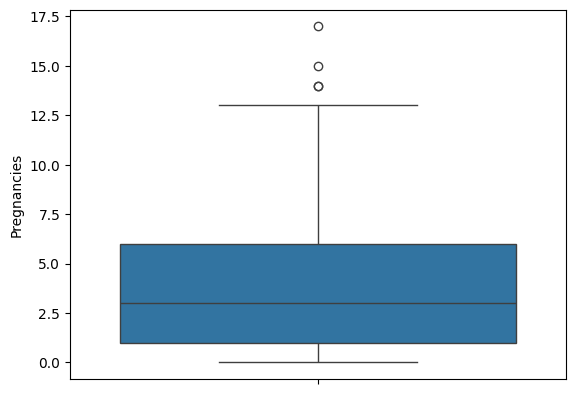

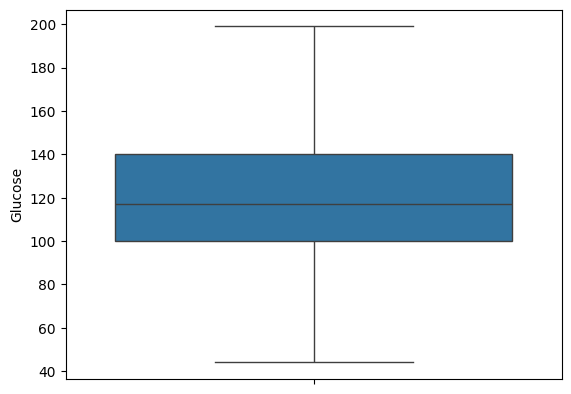

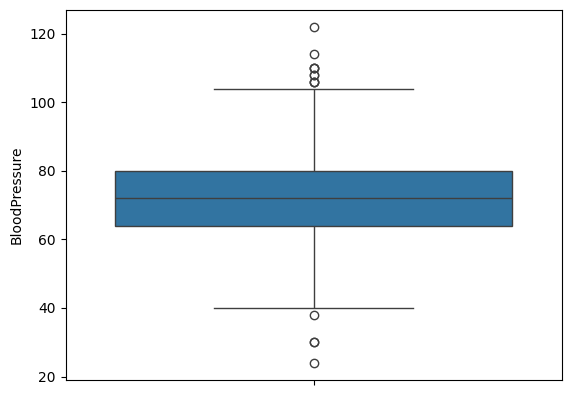

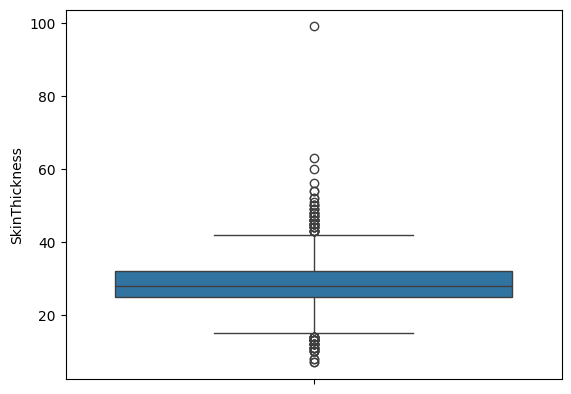

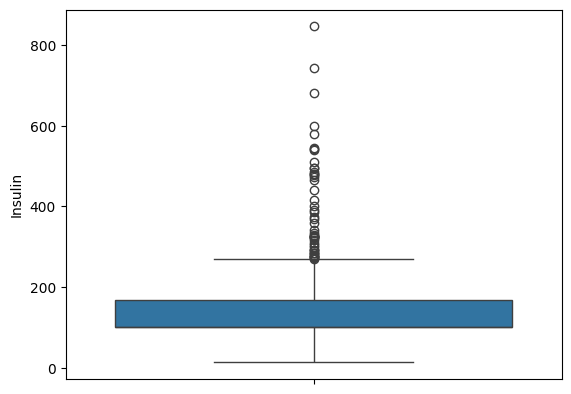

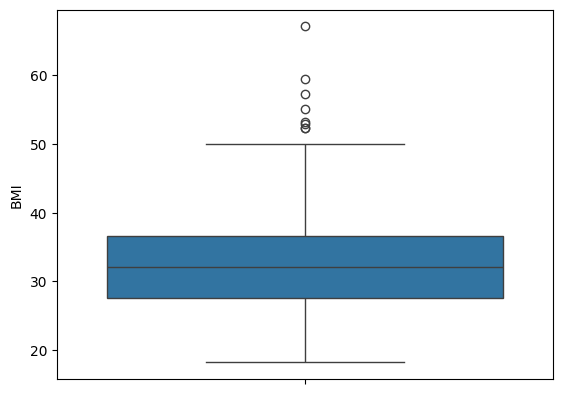

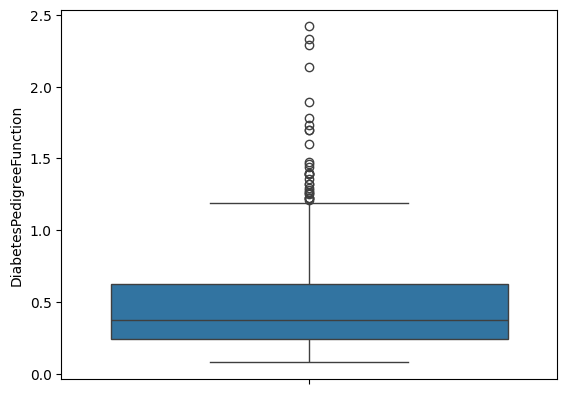

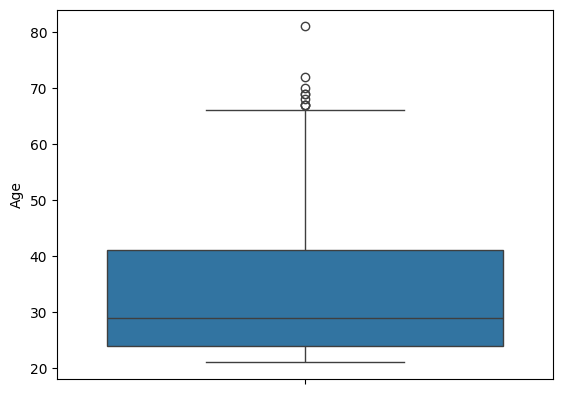

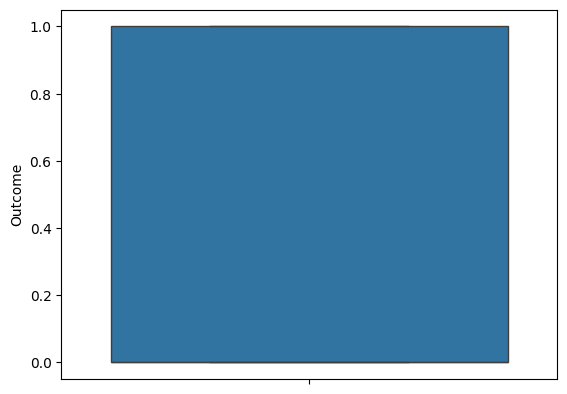

In [409]:
for col in my_dataset.columns:
  sns.boxplot(my_dataset[col])
  plt.show()

In [410]:
# handle outliers

for col in cols_zero:
  Q1 = my_dataset[col].quantile(0.25)
  Q3 = my_dataset[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  my_dataset[col] = np.where(my_dataset[col] < lower_bound, lower_bound, my_dataset[col])
  my_dataset[col] = np.where(my_dataset[col] > upper_bound, upper_bound, my_dataset[col])


# EDA

In [411]:
my_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0
8,2,197.0,70.0,42.5,270.0,30.5,0.158,53,1
9,8,125.0,96.0,32.0,169.5,34.3,0.232,54,1


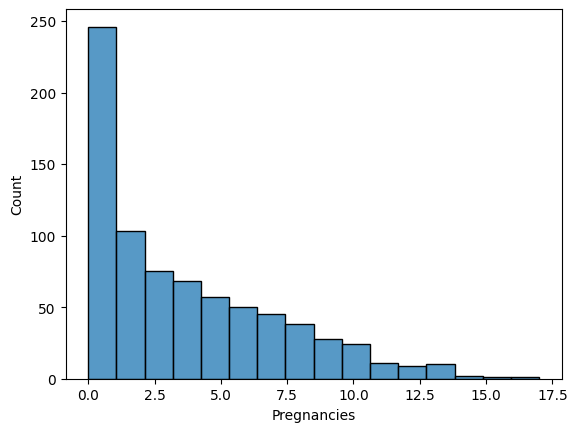

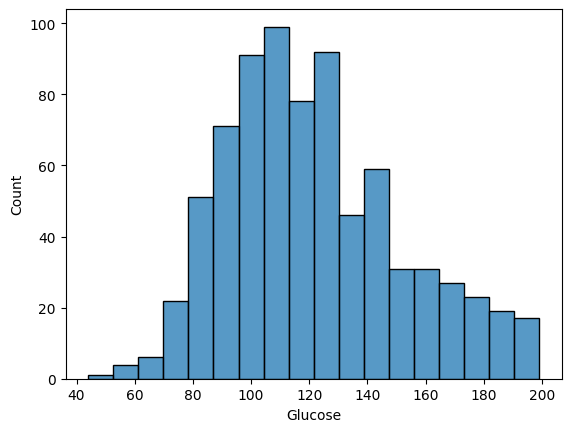

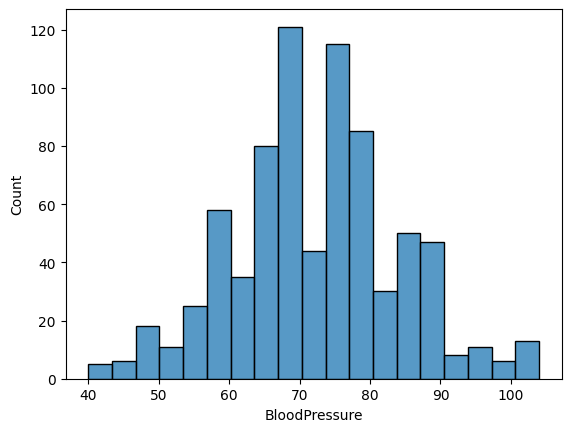

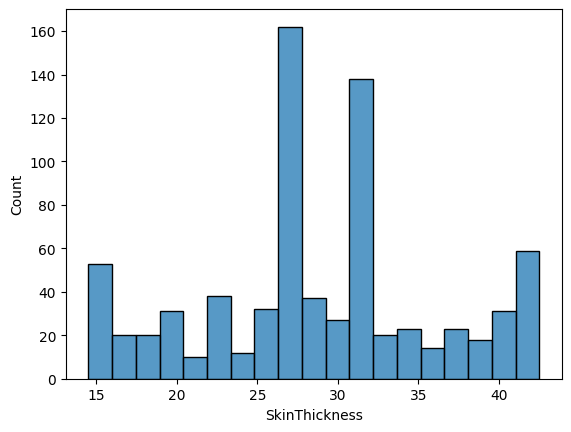

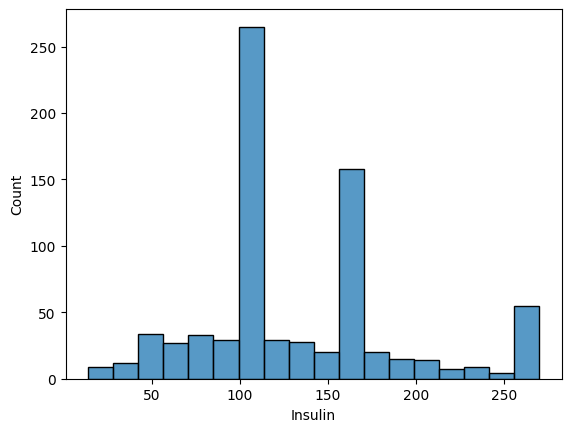

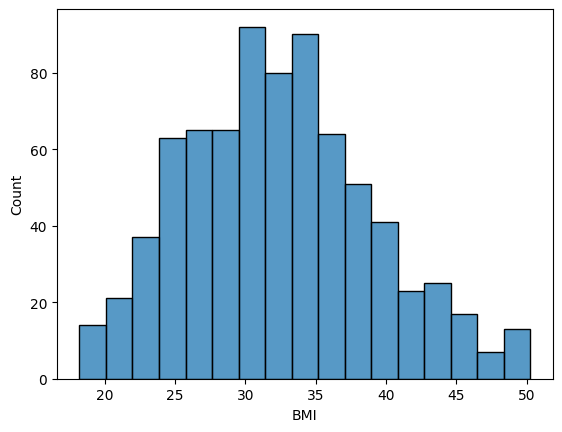

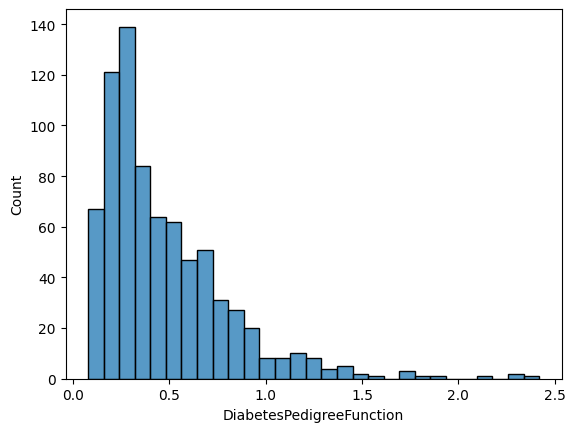

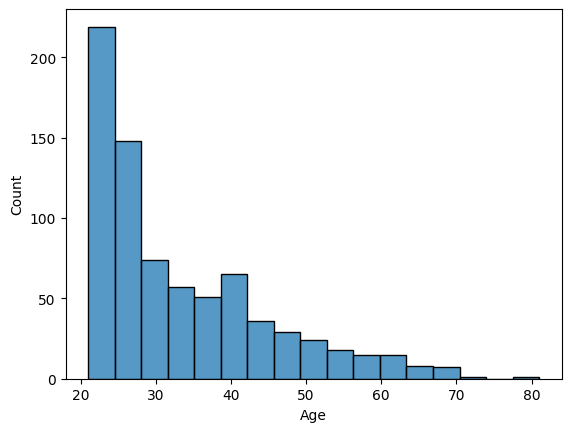

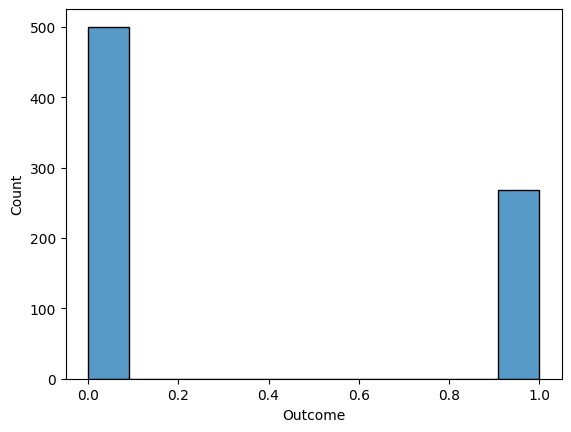

In [412]:
for col in my_dataset.columns:
  sns.histplot(my_dataset[col])
  plt.show()

# insights:


In [413]:
my_dataset["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


**How many patients have diabetes versus those who don’t?**

**Unblanced data**

Outcome

0 	==============> 500

1 =======================>	268


In [414]:
features = my_dataset.columns[:-1]

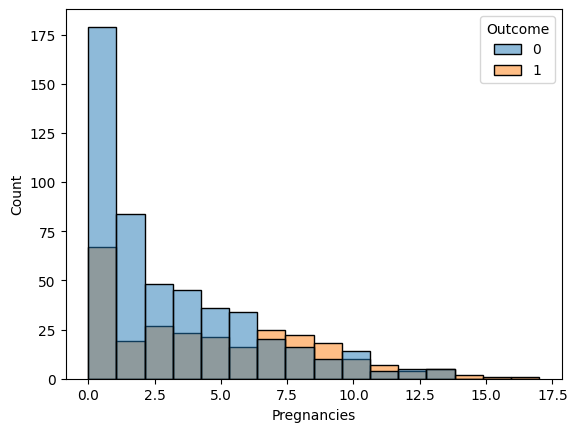

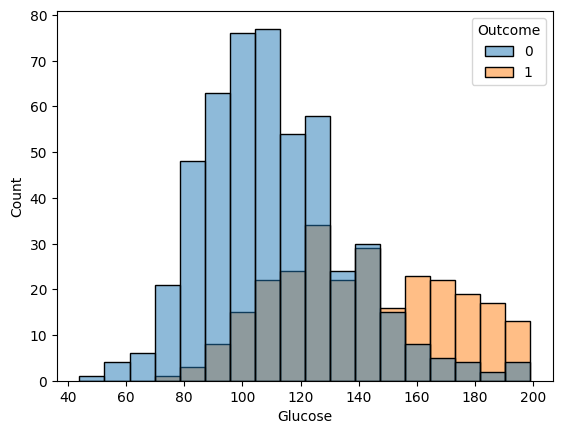

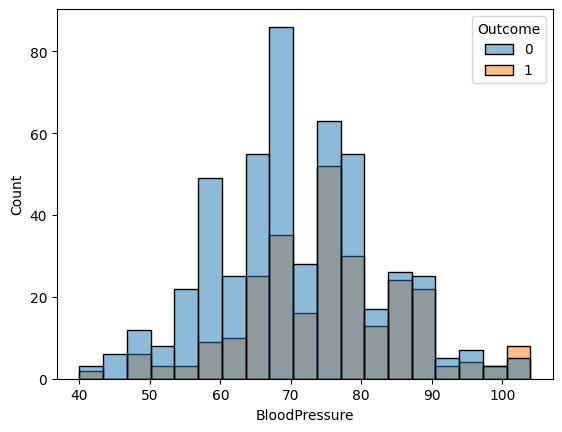

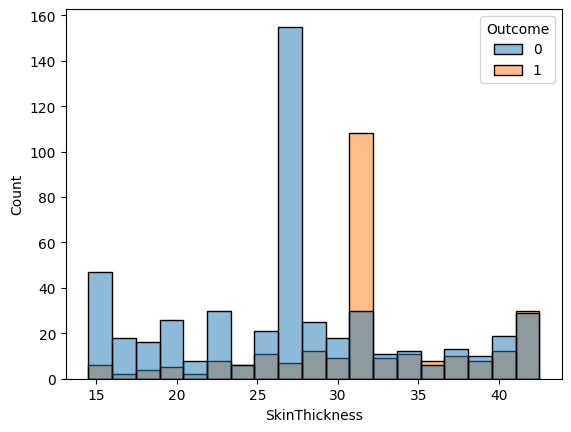

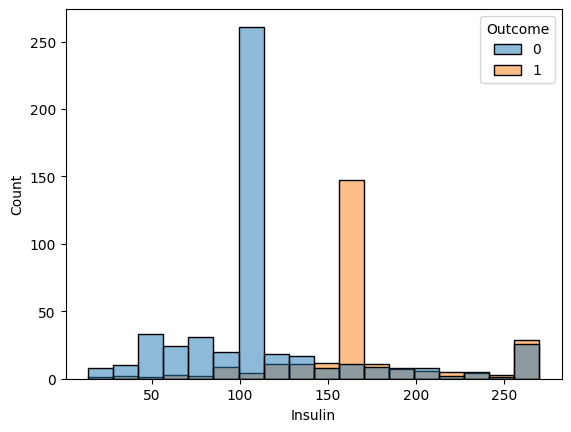

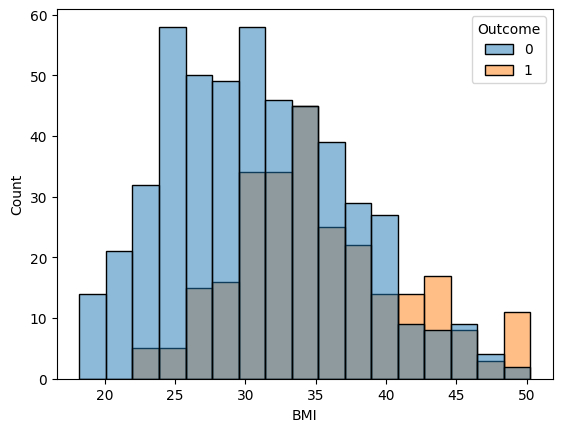

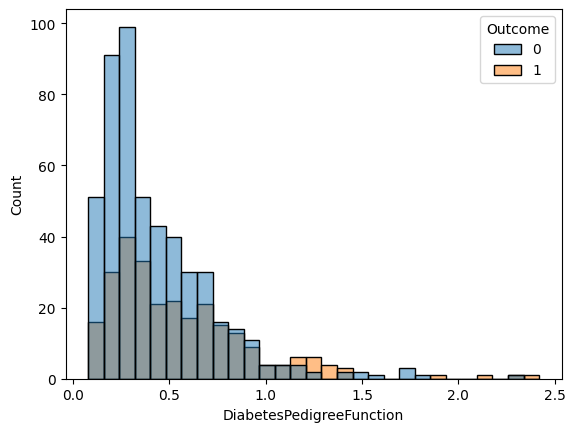

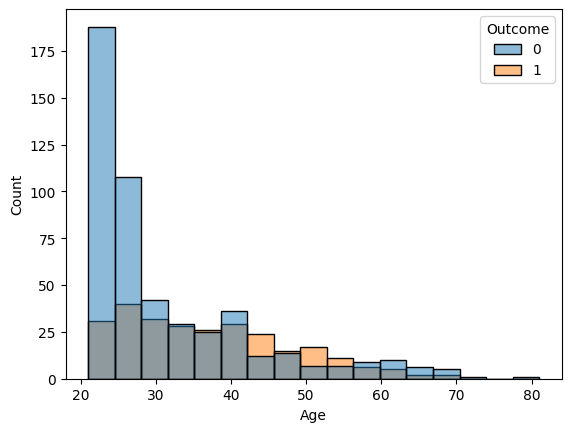

In [415]:
for col in features:
  sns.histplot(x=my_dataset[col],hue= my_dataset["Outcome"])
  plt.show()

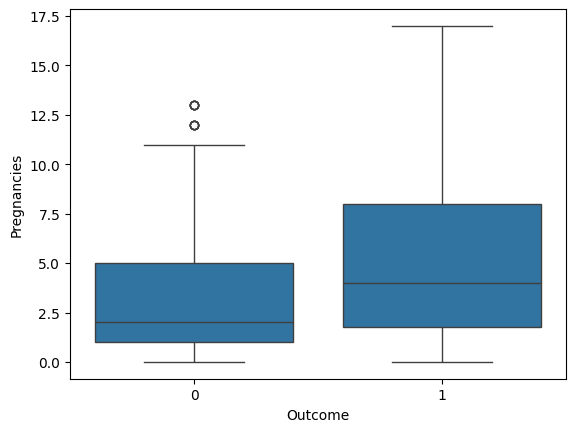

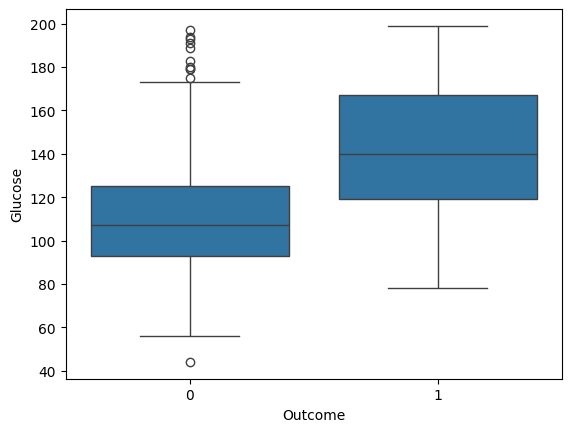

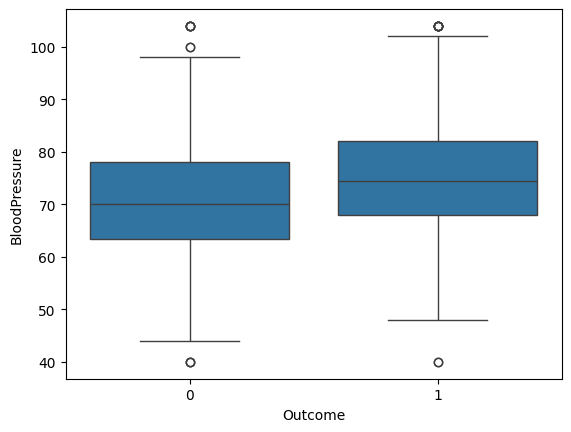

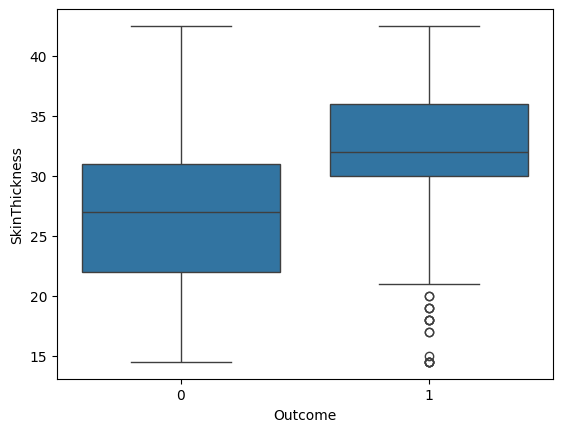

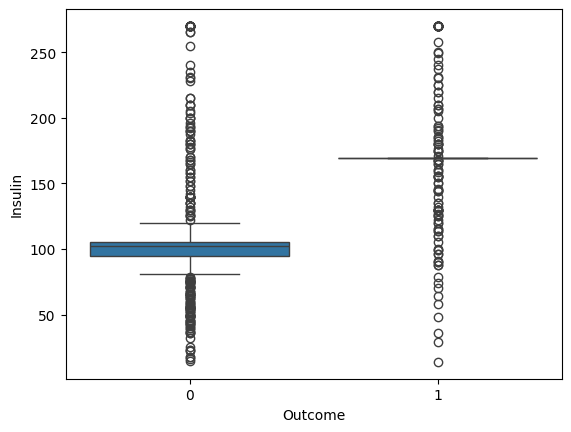

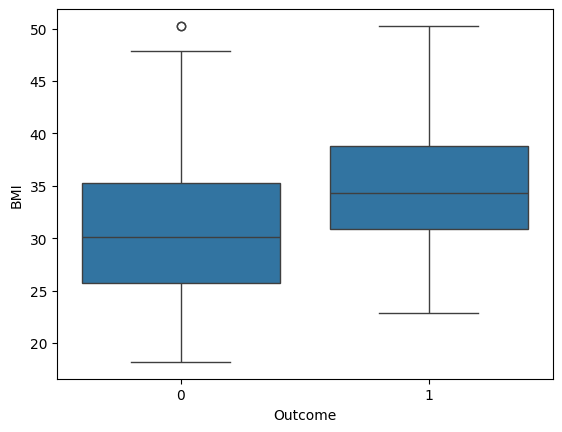

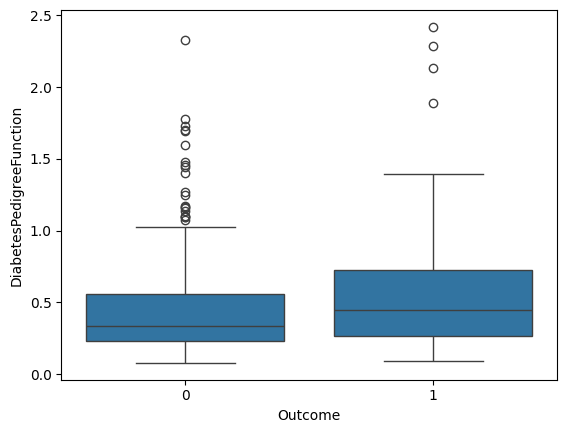

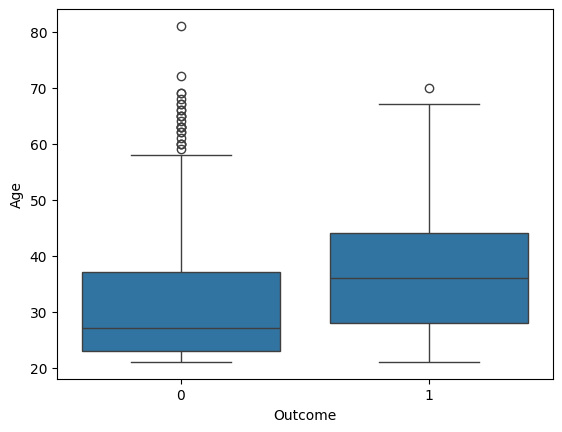

In [416]:
for col in features:
  sns.boxplot(x=my_dataset["Outcome"],y=my_dataset[col])
  plt.show()

In [417]:
for col in features:
  print(col)
  print(my_dataset.groupby("Outcome")[col].mean())
  print("===========================================")


Pregnancies
Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64
Glucose
Outcome
0    110.622000
1    142.302239
Name: Glucose, dtype: float64
BloodPressure
Outcome
0    70.836000
1    75.205224
Name: BloodPressure, dtype: float64
SkinThickness
Outcome
0    27.112000
1    32.087687
Name: SkinThickness, dtype: float64
Insulin
Outcome
0    111.794000
1    172.809701
Name: Insulin, dtype: float64
BMI
Outcome
0    30.827800
1    35.255224
Name: BMI, dtype: float64
DiabetesPedigreeFunction
Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64
Age
Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64


# Insights:



1.   Women with diabetes tend to have a higher number of pregnancies compared to non-diabetics.


2.   This is the strongest factor. The average glucose level for diabetic patients is significantly and clearly higher.


3.    The average blood pressure is slightly higher for diabetics, but the difference is not as significant as with glucose.


4.    The average skin thickness (subcutaneous fat) is higher in diabetic patients.


5.    The average insulin level is higher in diabetic patients, which might be due to insulin resistance.


6.    The average BMI for diabetics is clearly higher, confirming that obesity is a significant risk factor.


7.    The average age of diabetic patients is higher than non-diabetics, confirming that age is an important risk factor.






<Axes: >

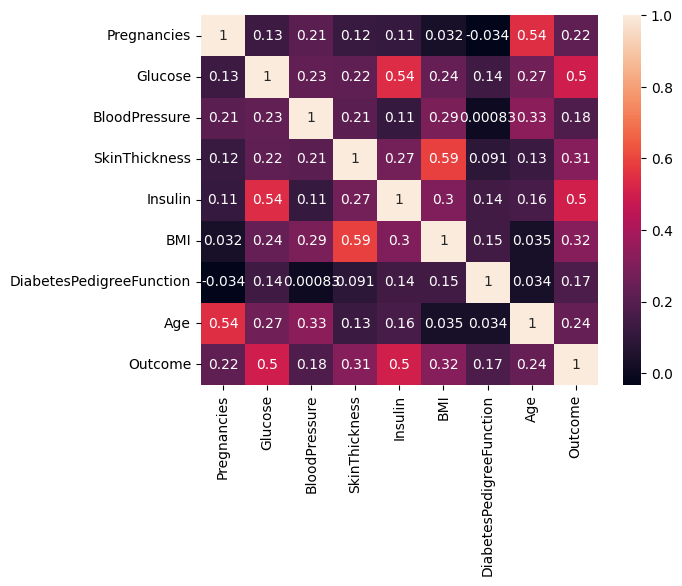

In [418]:
sns.heatmap(my_dataset.corr(),annot=True)


Analysis based on the image:

Relationship with Outcome
Glucose: The strongest relationship with Outcome is Glucose with a correlation coefficient of 0.49. This means that as glucose levels increase, the likelihood of having diabetes also increases.

BMI: BMI has the second strongest relationship with Outcome with a correlation coefficient of 0.31. This suggests that higher BMI values are associated with a higher probability of diabetes.

Age: Age is also a significant factor, with a correlation of 0.24 with Outcome. This indicates that as a person gets older, their risk of developing diabetes increases.



Relationships among other features

Age & Pregnancies: The correlation between Age and Pregnancies is 0.54, which is a strong relationship. This makes sense, as women who have had more pregnancies are generally older.


BMI & SkinThickness: There's a strong correlation of 0.56 between BMI and SkinThickness. This is logical because both features are indicators of body fat.


Glucose & Insulin: Glucose and Insulin have a moderate correlation of 0.41. As glucose levels rise, the body's pancreas typically releases more insulin to regulate blood sugar.


Glucose & Age: Glucose and Age have a moderate relationship, with a correlation of 0.27.

# Feature Engineering

In [419]:
my_dataset["Glucose_Age_Interaction"]=my_dataset["Glucose"]*my_dataset["Age"]

In [420]:
# BMI & SkinThickness: There's a strong correlation of 0.56 between BMI and SkinThickness. This is logical because both features are indicators of body fat.

In [421]:
# ignore "SkinThickness"  to avoid Multicollinearity

In [422]:
my_dataset["Pregnancies_per_Year"] = my_dataset["Pregnancies"]/my_dataset["Age"]

In [423]:
my_dataset["Insulin_Glucose_Ratio"] = my_dataset["Insulin"]/my_dataset["Glucose"]

In [424]:
my_dataset["Insulin_BMI_Ratio"] = my_dataset["Insulin"]/my_dataset["BMI"]

# Model Training

# Preprocessing

In [425]:
my_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Age_Interaction,Pregnancies_per_Year,Insulin_Glucose_Ratio,Insulin_BMI_Ratio
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,7400.0,0.120000,1.145270,5.044643
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,2635.0,0.032258,1.205882,3.853383
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,5856.0,0.250000,0.926230,7.274678
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1869.0,0.047619,1.056180,3.345196
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,4521.0,0.000000,1.226277,3.897912


In [426]:
model_samples = my_dataset.drop(["Outcome","SkinThickness"],axis=1)
target = my_dataset["Outcome"]

**split dataset**

In [427]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(model_samples, target, test_size=0.2, random_state=42)

# Modele

In [428]:
# gridsearch for logistic
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE # New Import for SMOTE
from collections import Counter # New Import for Counter

# The imputation part is commented out as you handled it manually.
# Let's assume X_train and X_test are already imputed.

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data ONLY, after scaling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Original training data shape: {Counter(y_train)}")
print(f"Resampled training data shape: {Counter(y_train_resampled)}")

# Now run GridSearchCV on the resampled data
grid_search_logistic = GridSearchCV(
    LogisticRegression(),
    param_grid={
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l2'],
        # We REMOVE 'class_weight' because SMOTE has balanced the data
    },
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Fit the grid search on the RESAMPLED data
grid_search_logistic.fit(X_train_resampled, y_train_resampled)

print(f"Best Parameters: {grid_search_logistic.best_params_}")
print(f"Best F1 Score: {grid_search_logistic.best_score_}")

Original training data shape: Counter({0: 401, 1: 213})
Resampled training data shape: Counter({0: 401, 1: 401})
Best Parameters: {'C': 1, 'penalty': 'l2'}
Best F1 Score: 0.8232179812745087


In [429]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# Define the parameter grid with logical combinations
param_grid = {
    'C': [0.1, 1, 10, 100],  # Values to test for C
    'penalty': ['l1', 'l2'],   # Values to test for penalty
    'loss': ['hinge', 'squared_hinge'],  # Values to test for penalty
    'class_weight': ['balanced'], # A new parameter to test
    'dual': ['auto', False],

}

# Create the GridSearchCV object with the F1 score
svc = LinearSVC(random_state=42)
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search on the scaled training data
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best F1 Score: {grid_search.best_score_}")

Best Parameters: {'C': 10, 'class_weight': 'balanced', 'dual': 'auto', 'loss': 'hinge', 'penalty': 'l2'}
Best F1 Score: 0.7922481194928004


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/svm/_classes.py", line 321, in fit
    self.coef_, self.intercept_, n_i

In [430]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define a new parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None], # None means no limit
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced'],

}

# Create a Random Forest model instance
rf_model = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Fit the grid search on the scaled training data
grid_search_rf.fit(X_train_scaled, y_train)

print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best F1 Score for Random Forest: {grid_search_rf.best_score_}")

Best Parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200}
Best F1 Score for Random Forest: 0.8522463144080327


# Evaluation

In [431]:
from sklearn.metrics import classification_report, confusion_matrix

best_logistic = grid_search_logistic.best_estimator_

# Predict the outcomes on the scaled testing data
y_pred_logistic = best_logistic.predict(X_test_scaled)

# print
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))


Confusion Matrix:
[[80 19]
 [ 7 48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        99
           1       0.72      0.87      0.79        55

    accuracy                           0.83       154
   macro avg       0.82      0.84      0.82       154
weighted avg       0.85      0.83      0.83       154



In [432]:
from sklearn.metrics import classification_report, confusion_matrix

best_linearSVC = grid_search.best_estimator_

# Predict the outcomes on the scaled testing data
y_pred_linearSVC = best_linearSVC.predict(X_test_scaled)

# Print the Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_linearSVC))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_linearSVC))

Confusion Matrix:
[[76 23]
 [ 5 50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.84        99
           1       0.68      0.91      0.78        55

    accuracy                           0.82       154
   macro avg       0.81      0.84      0.81       154
weighted avg       0.85      0.82      0.82       154



In [433]:
from sklearn.metrics import classification_report, confusion_matrix

# Get the best model found by GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Transform the testing data using the SAME scaler from the training step
# This is crucial to avoid data leakage
X_test_scaled = scaler.transform(X_test)

# Predict the outcomes on the scaled testing data
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Print the Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Print the Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Confusion Matrix:
[[86 13]
 [ 8 47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        99
           1       0.78      0.85      0.82        55

    accuracy                           0.86       154
   macro avg       0.85      0.86      0.85       154
weighted avg       0.87      0.86      0.86       154

